# John Snow Dataset : Working with very large data sets
## Introduction

This ipython notebook uses John Snow Labs health care providers data set to perform some basic data analysis and visualisations. It primarily makes use of the Dato graphlab.SFrame dataframe object to perform the analysis as this is scalable to very large out of memory datasets.

In this notebook we will explore the data set to answer the following questions:
1. Find all the currently practicing dentists in the New York neighbourhood of Kings Park
2. Which profession is the most common in the US?
3. What are the top 20 most common medical specialities in the US?
4. Which state has the most of the most common medical speciality? by total number? and as a proportion of that states medical professionals?
5. And finally, the question you have always wanted an answer for...Which state has the greatest proportion of Chiropractors? 

## Fire up graphlab and import other libaries

First we import graphlab as our primary data manipulation libary, but we also use seaborn for graphing. Later, for creating state by state visualisations we will use cartopy. In addition we set the notebook as the "target" for visualisations.

If you experience any errors on the import please install using either pip or conda
> Tip to install seaborn run 'pip install seaborn' from the command line

> Tip to intall cartopy run 'conda install -c scitools cartopy' from the terminal

In [1]:
import graphlab
import seaborn as sns

%matplotlib inline
graphlab.canvas.set_target('ipynb')

## Now load the data

If you are running this for the first time and do not have a copy of the SFrame entilted 'providers_sframe' in the same folder as this notebook, then expect this next step to take upto 10mins. 

If you do have a copy of the providers_sframe SFrame, then skip the next cell.

This is a great example of how efficient the SFrame is in handling very large, out of memory datasets.

In [ ]:
#Run this cell if you do not have a copy of the 'providers_sframe' SFrame file -- WARNING it will take ~10mins to load!
#Complete the path to your copy of the providers_data.csv
url = 'insert\path\to\providers_data.csv' 

#This loads the csv to the graphlab.SFrame object
data = graphlab.SFrame.read_csv(url)

#This saves the SFrame
data.save('providers_sframe')

In [1]:
#Run this cell if you have a copy of the 'providers_sframe' SFrame file. It must be in the same folder as this notebook
data = graphlab.SFrame('providers_sframe')

NameError: name 'graphlab' is not defined

## Now lets inspect the data

Lets look at the first 10 rows...

In [3]:
data.head()

NPI,Entity_Type,Replacement_NPI,Employer_Identification_Number ...,Provider_Organization_Name ...,Provider_Last_Name
1851471684,Individual,,,,RANGACHARI
1396825121,Individual,,,,GO
1205916038,Individual,,,,CHAMUDES
1023198850,Individual,,,,LEE
1932289766,Organization,,<UNAVAIL>,JUAN A SERRANO,
1295815025,Individual,,,,BAKER
1013097849,,,,,
1922188754,Individual,,,,PARK
1285714014,Individual,,,,ELDIK
1902986730,Individual,,,,SUPPIAH


How big is the data set?

In [4]:
data.shape

(4801451, 329)

Wow almost 5 million rows! and 329 columns!!

We dont need all this data so we are going to simplfy things a little by discarding all but the columns and rows that are specific to our analysis.

## Lets reduce the number of columns and rename the columns to something a little friendlier

In [5]:
# This is a list of the most useful columns for our analysis
cols_of_interest =['NPI',
 'Entity_Type',
 'Provider_Organization_Name',
 'Provider_First_Line_Business_Practice_Location_Address',
 'Provider_Second_Line_Business_Practice_Location_Address',
 'Provider_Business_Practice_Location_Address_City_Name',
 'Provider_Business_Practice_Location_Address_State_Code',
 'Provider_Business_Practice_Location_Address_Postal_Code',
 'Provider_Business_Practice_Location_Address_Country_Code',
 'NPI_Deactivation_Date',
 'Healthcare_Provider_Taxonomy_Code_1',
 'Is_Sole_Proprietor'
]

In [6]:
data = data[cols_of_interest]

In [7]:
data.shape

(4801451, 12)

Now only 12 columns. Lets rename the long ones for easier use later...

In [8]:
data.rename({
 'Provider_Organization_Name':'Name',
 'Provider_First_Line_Business_Practice_Location_Address': 'First_Line',
 'Provider_Second_Line_Business_Practice_Location_Address': 'Second_Line',
 'Provider_Business_Practice_Location_Address_City_Name':'City',
 'Provider_Business_Practice_Location_Address_State_Code': 'State_Code',
 'Provider_Business_Practice_Location_Address_Postal_Code': 'Zip',
 'Provider_Business_Practice_Location_Address_Country_Code': 'Country',
})

NPI,Entity_Type,Name,First_Line,Second_Line,City,State_Code
1851471684,Individual,,60 E DELAWARE PL,15TH FL,CHICAGO,IL
1396825121,Individual,,333 RAINIER AVE N STE 201,,RENTON,WA
1205916038,Individual,,3187 STEINWAY ST STE 6,,ASTORIA,NY
1023198850,Individual,,6797 N HIGH ST,SUITE 211,WORTHINGTON,OH
1932289766,Organization,JUAN A SERRANO,AL20 CALLE 30,SANTA JUANITA,BAYAMON,PR
1295815025,Individual,,15611 POMERADO RD,,POWAY,CA
1013097849,,,,,,
1922188754,Individual,,1096 36TH ST,,OGDEN,UT
1285714014,Individual,,51 PRIMROSE LN,,KINGS PARK,NY
1902986730,Individual,,1321 W WHITTAKER ST,,SALEM,IL


## Lets select only the individuals

The column named 'Entity_Type' has information on whether the row is related to an organisation or an individual. We only want individuals so we will filter on this column first.

Firts lets take a look at how the data is distributed in the column...

In [9]:
data['Entity_Type'].show()

So ~75% are individuals. Lets pull out only the rows with individuals.

In [10]:
# This comand  selects only the rows with the value 'Individual' in the 'Entity_Type' column
data = data[data['Entity_Type']=='Individual']
data

NPI,Entity_Type,Name,First_Line,Second_Line,City,State_Code,Zip,Country
1851471684,Individual,,60 E DELAWARE PL,15TH FL,CHICAGO,IL,606111495,US
1396825121,Individual,,333 RAINIER AVE N STE 201,,RENTON,WA,980575358,US
1205916038,Individual,,3187 STEINWAY ST STE 6,,ASTORIA,NY,111033952,US
1023198850,Individual,,6797 N HIGH ST,SUITE 211,WORTHINGTON,OH,430852533,US
1295815025,Individual,,15611 POMERADO RD,,POWAY,CA,920642437,US
1922188754,Individual,,1096 36TH ST,,OGDEN,UT,844032035,US
1285714014,Individual,,51 PRIMROSE LN,,KINGS PARK,NY,117543932,US
1902986730,Individual,,1321 W WHITTAKER ST,,SALEM,IL,628812013,US
1811077647,Individual,,6390 E THOMAS RD,#120,SCOTTSDALE,AZ,85251,US
1548340375,Individual,,3908 10TH ST SE,,PUYALLUP,WA,983742188,US


So now we only have individuals, and no organisations. Lets take a look at the size of our data set now

In [11]:
data.shape

(3587494, 12)

Still 3.5 million rows! And we still have a number of individuals who have been removed from the NCI. Lets also remove these individuals...

In [12]:
# This command evaluates each cell in the 'NPI_Deactivation_Date' column. If a date is present then that row is dropped. 
data = data[data['NPI_Deactivation_Date'].apply(lambda x: len(x)==0)] 
# And lets drop the column now we have finshed with it
data.remove_column('NPI_Deactivation_Date')

NPI,Entity_Type,Name,First_Line,Second_Line,City,State_Code,Zip,Country
1851471684,Individual,,60 E DELAWARE PL,15TH FL,CHICAGO,IL,606111495,US
1396825121,Individual,,333 RAINIER AVE N STE 201,,RENTON,WA,980575358,US
1205916038,Individual,,3187 STEINWAY ST STE 6,,ASTORIA,NY,111033952,US
1023198850,Individual,,6797 N HIGH ST,SUITE 211,WORTHINGTON,OH,430852533,US
1295815025,Individual,,15611 POMERADO RD,,POWAY,CA,920642437,US
1922188754,Individual,,1096 36TH ST,,OGDEN,UT,844032035,US
1285714014,Individual,,51 PRIMROSE LN,,KINGS PARK,NY,117543932,US
1902986730,Individual,,1321 W WHITTAKER ST,,SALEM,IL,628812013,US
1811077647,Individual,,6390 E THOMAS RD,#120,SCOTTSDALE,AZ,85251,US
1548340375,Individual,,3908 10TH ST SE,,PUYALLUP,WA,983742188,US


In [13]:
data.shape

(3583147, 11)

## Finding all Dentists!

To find all the dentists we have to first map each individual to their speciality. This mapping can be done via the  'Healthcare_Provider_Taxonomy_Code_1' column. But first we need to get the taxonomy details. Luckily there is an online resource for this information. We will read it in and join it to our data set.

In [14]:
# SFrames can also read from urls
taxonomy = graphlab.SFrame('http://www.nucc.org/images/stories/CSV/nucc_taxonomy_160.csv')

Downloading http://www.nucc.org/images/stories/CSV/nucc_taxonomy_160.csv to C:/Users/Home/AppData/Local/Temp/graphlab-Home/1872/9877625f-8dd0-4eef-a4af-9c39d432a8e1.csv

Finished parsing file http://www.nucc.org/images/stories/CSV/nucc_taxonomy_160.csv

Parsing completed. Parsed 100 lines in 0.031251 secs.

Finished parsing file http://www.nucc.org/images/stories/CSV/nucc_taxonomy_160.csv

Parsing completed. Parsed 845 lines in 0.020003 secs.

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


In [15]:
#Lets take a look at our new taxonomy table...
taxonomy.head()

Code,Grouping,Classification,Specialization
101Y00000X,Behavioral Health &Social Service Providers ...,Counselor,
101YA0400X,Behavioral Health &Social Service Providers ...,Counselor,Addiction (Substance UseDisorder) ...
101YM0800X,Behavioral Health &Social Service Providers ...,Counselor,Mental Health
101YP1600X,Behavioral Health &Social Service Providers ...,Counselor,Pastoral
101YP2500X,Behavioral Health &Social Service Providers ...,Counselor,Professional
101YS0200X,Behavioral Health &Social Service Providers ...,Counselor,School
102L00000X,Behavioral Health &Social Service Providers ...,Psychoanalyst,
102X00000X,Behavioral Health &Social Service Providers ...,Poetry Therapist,
103G00000X,Behavioral Health &Social Service Providers ...,ClinicalNeuropsychologist ...,
103GC0700X,Behavioral Health &Social Service Providers ...,ClinicalNeuropsychologist ...,Clinical


In [16]:
# First we strip out the columns we dont need
taxonomy = taxonomy[taxonomy.column_names()[:4]]

In [17]:
#Now we make the join of taxonomy to data
data = data.join(taxonomy, on={'Healthcare_Provider_Taxonomy_Code_1':'Code'}, how='left')

Lets take a look at our new data table

In [18]:
data.head()

NPI,Entity_Type,Name,First_Line,Second_Line,City,State_Code,Zip,Country
1851471684,Individual,,60 E DELAWARE PL,15TH FL,CHICAGO,IL,606111495,US
1396825121,Individual,,333 RAINIER AVE N STE 201,,RENTON,WA,980575358,US
1205916038,Individual,,3187 STEINWAY ST STE 6,,ASTORIA,NY,111033952,US
1023198850,Individual,,6797 N HIGH ST,SUITE 211,WORTHINGTON,OH,430852533,US
1295815025,Individual,,15611 POMERADO RD,,POWAY,CA,920642437,US
1922188754,Individual,,1096 36TH ST,,OGDEN,UT,844032035,US
1285714014,Individual,,51 PRIMROSE LN,,KINGS PARK,NY,117543932,US
1902986730,Individual,,1321 W WHITTAKER ST,,SALEM,IL,628812013,US
1811077647,Individual,,6390 E THOMAS RD,#120,SCOTTSDALE,AZ,85251,US
1548340375,Individual,,3908 10TH ST SE,,PUYALLUP,WA,983742188,US


## Now lets list all the dentists in Kings Park, NY

In [19]:
print data[(data['Classification']=='Dentist' )& (data['State_Code']=='NY') & (data['City']=='KINGS PARK')]

+------------+-------------+------+-------------------+-------------+------------+
|    NPI     | Entity_Type | Name |     First_Line    | Second_Line |    City    |
+------------+-------------+------+-------------------+-------------+------------+
| 1285714014 |  Individual |      |   51 PRIMROSE LN  |             | KINGS PARK |
| 1386964583 |  Individual |      |     90 MAIN ST    |             | KINGS PARK |
| 1881804730 |  Individual |      |    21 ELLEN PL    |             | KINGS PARK |
| 1619947009 |  Individual |      | 25 INDIAN HEAD RD |             | KINGS PARK |
| 1841375482 |  Individual |      |   73 RUMFORD RD   |             | KINGS PARK |
| 1477764090 |  Individual |      |   7 MERIDIAN AVE  |             | KINGS PARK |
| 1669558151 |  Individual |      |     93 MAIN ST    |             | KINGS PARK |
| 1851303507 |  Individual |      |     90 MAIN ST    |             | KINGS PARK |
| 1003839556 |  Individual |      | 55 INDIAN HEAD RD |             | KINGS PARK |
+---

This approach of filtering any of the columns can be used to select any subset of the data.

Why not try some additional searches?

## Lets look at the specialities in more detail

In the next section we will make some basic aggregations on the data. Specifically we will figure out what are the most common medical specialities in the US, we will break this down by state, and then finally graph the most common speciality on a US map.  

### What is the most common medical speciality in the US?

In [21]:
specialities = data.groupby(key_columns = 'Classification', operations = {'count': graphlab.aggregate.COUNT('NPI')} )

In [22]:
specialities.sort('count', ascending = False)

Classification,count
Counselor,297584
Internal Medicine,228577
Dentist,213090
Social Worker,203534
Nurse Practitioner,187100
Pharmacist,171195
Student in an OrganizedHealth Care ...,162271
Physical Therapist,155738
Family Medicine,121558
Registered Nurse,115618


Note that there are 228 rows in this data set. This is rather too many for us so we will take only the top 20.

### What are the top 20 most common medical specialities in the US?¶

In [23]:
top_20_specialities = specialities.sort('count', ascending = False)[:20]

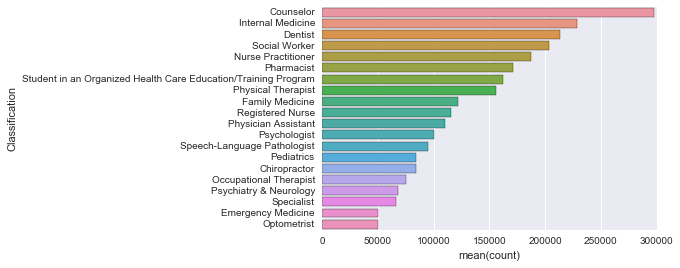

In [24]:
# Lets plot this to see how it looks
sns.barplot(x='count', y = 'Classification', data = top_20_specialities.to_dataframe())

   ### Now,  lets plot this information by state 

First lets create a new SFrame that contains the counts by state and speciality

In [25]:
state_specialities = data.groupby(key_columns = ['Classification', 'State_Code'], 
                                      operations = {'count':  graphlab.aggregate.COUNT('NPI')} )

In [26]:
# And lets take a look at what that data looks like...
state_specialities.head()

Classification,State_Code,count
Pain Medicine,IL,84
Nuclear Medicine,NV,3
Voluntary or Charitable,SC,1
"Spec/Tech, Cardiovascular",NV,3
Internal Medicine,AB,1
Recreation Therapist,WA,25
Single Specialty,NV,1
Plastic Surgery,SANTA CATARINA,1
Pain Medicine,FL,183
"Hospice Care, CommunityBased ...",SC,1


Lets take a quick look at the states in state_specialities

In [27]:
state_specialities['State_Code']

dtype: str
Rows: 10143
['IL', 'NV', 'SC', 'NV', 'AB', 'WA', 'NV', 'SANTA CATARINA', 'FL', 'SC', 'IA', 'OK', 'WA', 'MD', 'OK', 'AB', 'NH', 'OK', 'NC', 'AR', 'OK', 'NC', 'TAMPA', 'IL', 'IL', 'FL', 'LA', 'SC', 'CA', 'WA', 'NH', 'CA', 'NJ', 'SC', 'OK', 'SC', 'SC', 'CA', 'FL', 'FL', 'FL', 'MD', 'GUAYNABO', 'DE', 'DE', 'WA', 'NC', 'NV', 'NV', 'CA', 'AR', 'FL', 'NV', 'LA', 'WA', 'IL', 'CA', 'IA', 'FL', 'MD', 'ATTIKIS', 'SC', 'AR', 'WA', 'AR', 'AR', 'IA', 'CA', 'NC', 'KOREA', 'KOREA', 'AR', 'AR', 'NJ', 'SP', 'NV', 'MD', 'LA', 'NJ', 'AR', 'MD', 'MD', 'NV', 'AE', 'DE', 'CA', 'WA', 'GUAM', 'LA', 'SC', 'IA', 'DE', 'IA', 'AR', 'MIE', 'NH', 'NC', 'SC', 'WA', 'WA', ... ]

It looks a little messy, with data like 'ATTIKIS' and 'TAMPA' lets filter this so we have only  a list of mainland US state codes.

In [28]:
# Lets make an array of states we want
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
          'KS', 'KY', 'LA', 'ME', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 
          'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 
          'WV', 'WI', 'WY']

In [29]:
# Here we build a new dataframe by sequntially filtering on each element in the states array 
for index, state in enumerate(states):
    
    if index == 0:
        new_df = state_specialities[state_specialities['State_Code']==state]
    else :    
        new_df = new_df.append(state_specialities[state_specialities['State_Code']==state])
    
# And just update our original dataframe        
state_specialities= new_df

In [30]:
# Take a quick look
state_specialities

Classification,State_Code,count
"Spec/Tech, Health Info",AL,3
Naturopath,AL,4
"Specialist/Technologist,Other ...",AL,39
Case Management,AL,1
"NeuromusculoskeletalMedicine, Sports Medi ...",AL,7
In Home Supportive Care,AL,4
Hearing InstrumentSpecialist ...,AL,56
Dentist,AL,2221
Hearing Aid Equipment,AL,1
Military Health CareProvider ...,AL,32


### The next cell create a function to draw a nice map of all the states in the US. 

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
def create_map (data):
    ax = plt.axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural',
                                         name='admin_1_states_provinces_lakes_shp')
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    title = data['Classification'][0]
    if 'percentage' in data.column_names():
        maximum = float(data['percentage'].max())
        plt.title('Comparative percentages of %s proffessionals by state' % title)
    else:
        maximum = float(data['count'].max())
        plt.title('Number of %s proffessionals by state' % title)
        
    states = shpreader.Reader(states_shp)
    for state in states.records():
        s = state.geometry
        name = state.attributes['postal']
        if 'percentage' in data.column_names():
            alpha = (data[data['State_Code']==name]['percentage'][0])/maximum
        else:
            alpha = (data[data['State_Code']==name]['count'][0])/maximum
        # pick a default color for the land with a black outline
        facecolor = 'red'
        edgecolor = 'black'
        ax.add_geometries([s], ccrs.PlateCarree(),
                               facecolor=facecolor, edgecolor=edgecolor, alpha=alpha)

    plt.show()

Lets run that function on our data

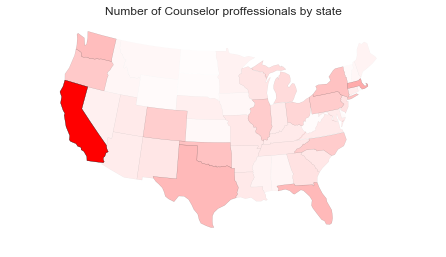

In [33]:
create_map(state_specialities[state_specialities['Classification'] == 'Counselor'])

As you can see California has the largest number of Counselors

You can try this with any of the specialities... Below is a list of all those to try...

In [34]:
specialities.sort('count', ascending = False)[:50].print_rows(num_rows =50)

+--------------------------------+--------+
|         Classification         | count  |
+--------------------------------+--------+
|           Counselor            | 297584 |
|       Internal Medicine        | 228577 |
|            Dentist             | 213090 |
|         Social Worker          | 203534 |
|       Nurse Practitioner       | 187100 |
|           Pharmacist           | 171195 |
| Student in an Organized He...  | 162271 |
|       Physical Therapist       | 155738 |
|        Family Medicine         | 121558 |
|        Registered Nurse        | 115618 |
|      Physician Assistant       | 109986 |
|          Psychologist          | 100428 |
|  Speech-Language Pathologist   | 95395  |
|           Pediatrics           | 84176  |
|          Chiropractor          | 83903  |
|     Occupational Therapist     | 75139  |
|     Psychiatry & Neurology     | 68008  |
|           Specialist           | 66727  |
|       Emergency Medicine       | 50282  |
|          Optometrist          

## Hang on a second!

The counts are biased by the number of proffesionals in each state! Lets normalise for this and calculate the % of each speciallity by state and then replot this.

In [35]:
# This cell calculates the total number of practioners by state 
percentage_df= state_specialities.groupby(key_columns='State_Code', 
                                    operations ={'TOTAL': graphlab.aggregate.SUM('count')})

In [36]:
#Lets take a look
percentage_df

State_Code,TOTAL
LA,42460
NM,30618
ME,20675
TX,194804
MI,114528
AL,34846
KS,30479
MS,22097
ND,9990
WY,7765


In [37]:
# Here we join the two tables and calculate the percentage
state_specialities= state_specialities.join(percentage_df, how='left')
state_specialities['percentage']= state_specialities.apply(lambda x: float(x['count']/float(x['TOTAL'])*100 ))
state_specialities

Classification,State_Code,count,TOTAL,percentage
"Spec/Tech, Health Info",AL,3,34846,0.00860930953338
Naturopath,AL,4,34846,0.0114790793778
"Specialist/Technologist,Other ...",AL,39,34846,0.111921023934
Case Management,AL,1,34846,0.00286976984446
"NeuromusculoskeletalMedicine, Sports Medi ...",AL,7,34846,0.0200883889112
In Home Supportive Care,AL,4,34846,0.0114790793778
Hearing InstrumentSpecialist ...,AL,56,34846,0.16070711129
Dentist,AL,2221,34846,6.37375882454
Hearing Aid Equipment,AL,1,34846,0.00286976984446
Military Health CareProvider ...,AL,32,34846,0.0918326350227


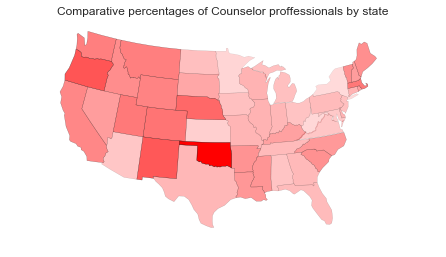

In [38]:
create_map(state_specialities[state_specialities['Classification'] == 'Counselor'])

So it appears that Oklahoma has the greatest proportion of Counselors!

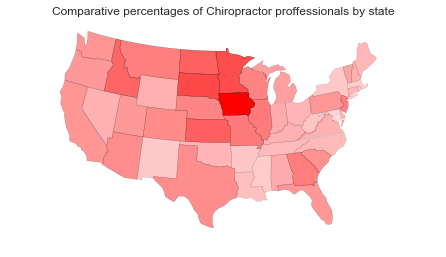

In [39]:
create_map(state_specialities[state_specialities['Classification'] == 'Chiropractor'])

But Iowa like their Chiropractors!